<a href="https://colab.research.google.com/github/khushurs98/Machine-Learning-/blob/main/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns


In [3]:
df=pd.read_csv('/content/insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

<ipython-input-17-5d73b3aa6e95>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


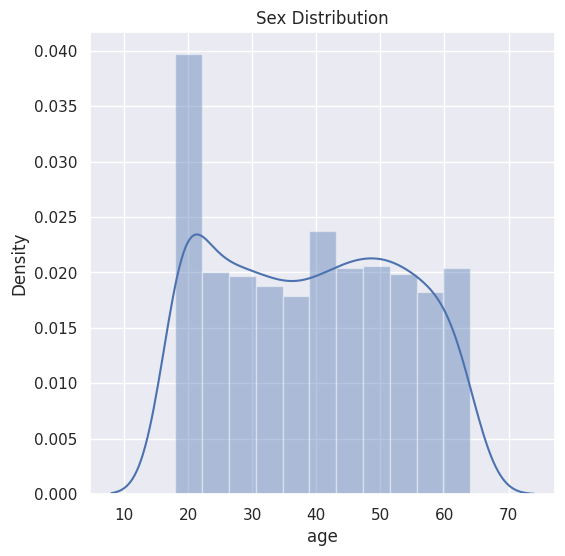

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Sex Distribution')
plt.show()

In [18]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [19]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [20]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [24]:
print(y.shape,y_train.shape,y_test.shape)

(1338,) (1070,) (268,)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [31]:
model=LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.score(x_train,y_train)

0.751505643411174

In [34]:
trainacc=model.predict(x_train)
trainaccuracy=metrics.r2_score(y_train,trainacc)

In [35]:
trainaccuracy

0.751505643411174

In [36]:
testacc=model.predict(x_test)
testaccuracy=metrics.r2_score(y_test,testacc)

In [37]:
testaccuracy

0.7447273869684076

In [38]:
r2_score=model.score(x_test,y_test)

In [40]:
r2_score

0.7447273869684076

In [41]:
input_data=(31,1,25.74,0,1,0)

In [42]:
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

In [45]:
prediction=model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
print("Insurance in USD is:",prediction[0])

Insurance in USD is: 3760.080576496057
